<h1>
<font color="#ff2e2e">
Corner Detection
</font>
</h1>

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [59]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete the harris_points function without using OpenCV functions </font></h3>

In [60]:
def harris_points(image):
    """
    Computes Harris corner detection for the given image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The corner image.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Compute derivatives using Sobel operator
    dx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)

    # Compute products of derivatives
    Ixx = dx ** 2
    Ixy = dx * dy
    Iyy = dy ** 2

    # Apply Gaussian smoothing to products of derivatives
    ksize_g = 3
    sigma = 1.5
    k_g = cv2.getGaussianKernel(ksize_g, sigma)
    k_g = k_g * k_g.T
    Ixx = cv2.filter2D(Ixx, -1, k_g)
    Ixy = cv2.filter2D(Ixy, -1, k_g)
    Iyy = cv2.filter2D(Iyy, -1, k_g)

    # Compute Harris response function
    k = 0.04
    detM = Ixx * Iyy - Ixy ** 2
    traceM = Ixx + Iyy
    R = detM - k * traceM ** 2

    # Threshold the response image
    corner_image = np.zeros(image.shape)
    threshold = 0.01
    corner_image[R > threshold * R.max()] = [0, 0, 255]

    return corner_image


<h3><font color = "#079e05"> Show the result </font></h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


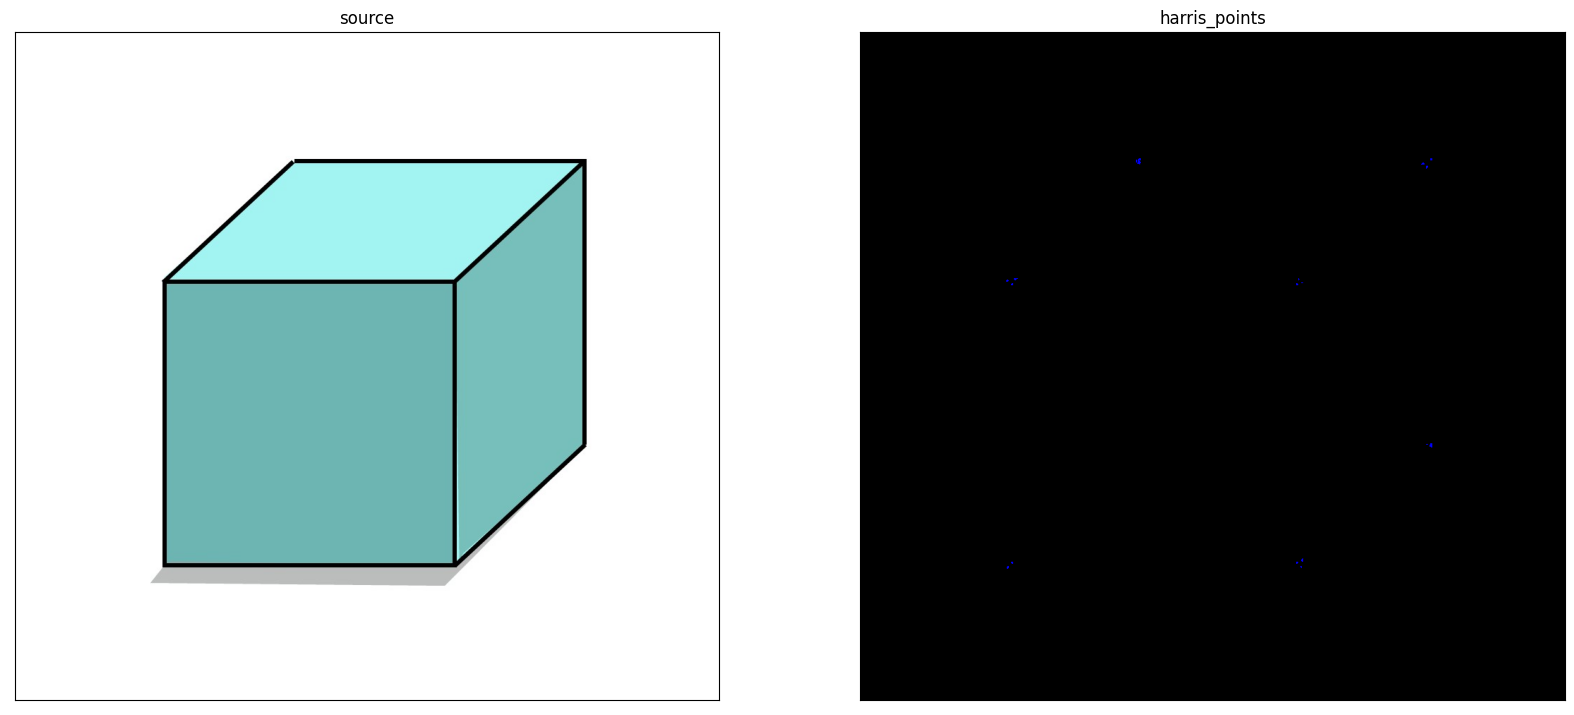

In [61]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points(image), 'harris_points', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')

<h3><font color = "#079e05"> Complete the harris_points_OpenCV function with using OpenCV functions </font></h3>

In [62]:
def harris_points_OpenCV(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''  
    
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Apply Harris corner detection
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)

    # result is dilated for marking the corners, not important
    dst = cv2.dilate(dst, None)
    
    corner_image = np.zeros(image.shape)
    corner_image[dst > 0.01 * dst.max()] = [0, 0, 255]

    # # Threshold for an optimal value, it may vary depending on the image.
    # image[dst > 0.01 * dst.max()] = [0, 0, 255]

    return corner_image

<h3><font color = "#079e05"> Show the result </font></h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


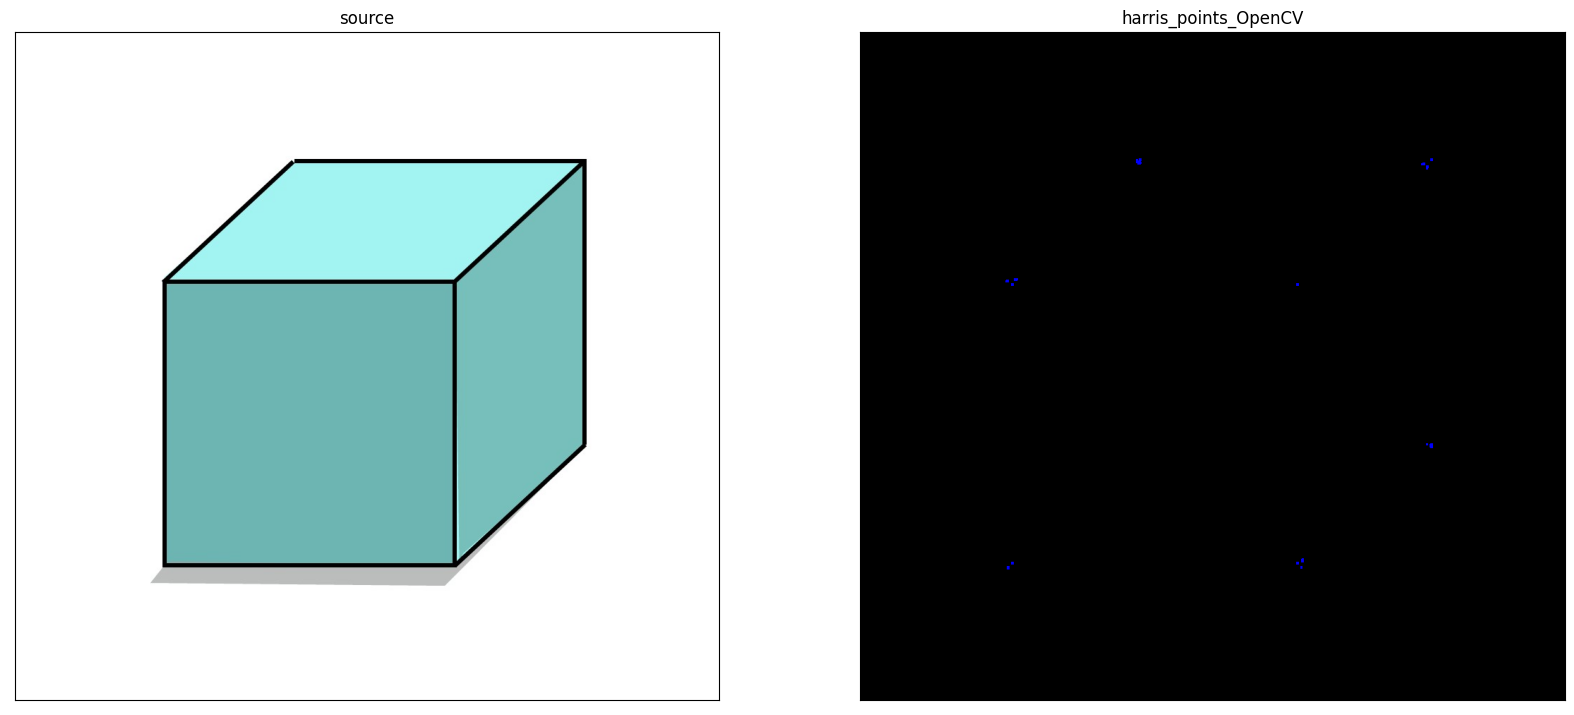

In [57]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points_OpenCV(image), 'harris_points_OpenCV', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')